## Estadística Aplicada

Actividad 5 - 19 septiembre

Karla Mariana Ley Acero- 2076201

Grupo 42

- En el enlace se encuentra la base de datos “quiebra.csv” que mide los años 
que tarda en quebrar una empresa (desde que se crea hasta que quiebra), la 
variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada
(no se observó la quiebra en el periodo de observación). La variable mujer toma 
valores de 0 si el fundador de la empresa es hombre y 1 si el fundador de la 
empresa es mujer. La variable tiempo mide los años que tardo en quebrar la 
empresa. Responda en una notebook de Python cada inciso.


In [1]:
#Importar las librerías basicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
# Leer la base de datos

años_quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [3]:
# Mostrar base de datos
años_quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


a) Ajuste un modelo de supervivencia exponencial 

In [5]:
pip install lifelines

                                              0.0/350.7 kB ? eta -:--:--
     ----                                  41.0/350.7 kB 991.0 kB/s eta 0:00:01
     ---------                               81.9/350.7 kB 1.5 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92.2/350.7 kB 1.1 MB/s eta 0:00:01
     ----------                              92

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
## Libreria especializada
# Libreria especializada en modelos de supervivencia

from lifelines import ExponentialFitter

In [9]:
# Modelo de supervivencia exponecial 
modelo_exponen = ExponentialFitter().fit(años_quiebra ['tiempo'], años_quiebra['quebrar'])

In [11]:
pip install jinja2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/133.1 kB ? eta -:--:--
     ---------------------------             92.2/133.1 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00


In [12]:
modelo_exponen.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

b) Grafique la función de riesgo exponencial


(1.0, 30.0)

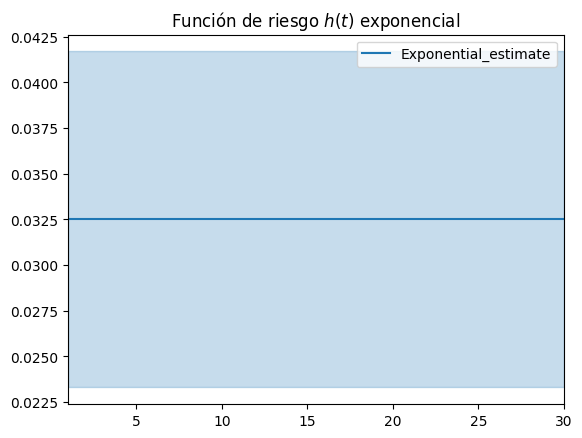

In [24]:
## Graficar h(t)

modelo_exponen.plot_hazard();
plt.title ('Función de riesgo $h(t)$ exponencial')
plt.xlim(min(años_quiebra['tiempo']),max(años_quiebra['tiempo']))

d) ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial?

In [18]:
modelo_exponen.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


El riesgo que una empresa quiebre es de 3.24%

##### 4.- Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

a) Ajuste un modelo Weibull de supervivencia

In [22]:
# Importar el calculo de la Weibull
## Python no le llama Gamma, le llama rho_

from lifelines import WeibullFitter

In [27]:
mweibull = WeibullFitter().fit(años_quiebra ['tiempo'], años_quiebra ['quebrar'])

In [28]:
mweibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

b) Grafique la función de riesgo

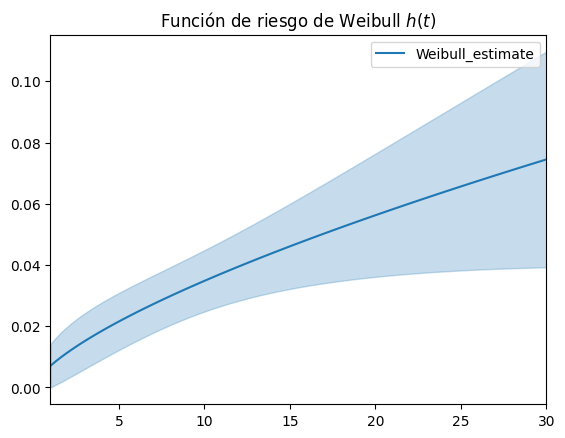

In [29]:
mweibull.plot_hazard()
plt.title('Función de riesgo de Weibull $h(t)$')
plt.xlim(min(años_quiebra['tiempo']),max(años_quiebra['tiempo']));

c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

Tiene una forma creciente, significa que el riesgo de qubrar es más grande conforme los años de la empresa pasan

##### 5.- Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

a) Ajuste un modelo Log-Normal

In [30]:
## # Importar el calculo de la LogNormal 

from lifelines import LogNormalFitter

In [32]:
mlogn = LogNormalFitter().fit(años_quiebra ['tiempo'], años_quiebra ['quebrar'])

In [33]:
mlogn.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

b) Grafique la función de riesgo

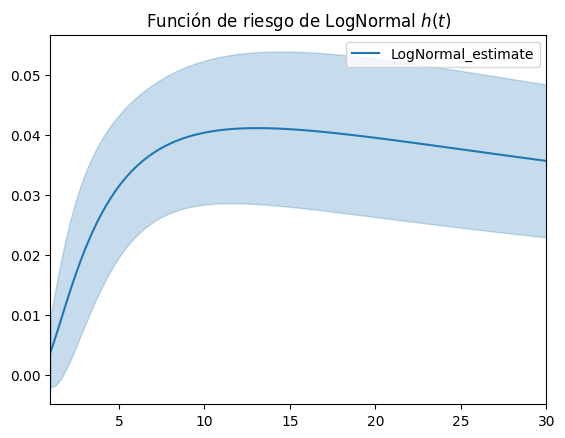

In [34]:
mlogn.plot_hazard()
plt.title('Función de riesgo de LogNormal $h(t)$')
plt.xlim(min(años_quiebra['tiempo']),max(años_quiebra['tiempo']));

c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente


El periodo de riesgo de quebrar es creciento en los primeros años, una vez llegado al año 10 tiende a decrecer. El riesgo de quebrar va disminuyendo entre más años tenga la empresa

##### 6.- Utilizando el estimador de Kaplan-Meier realice una notebook en Python para responder lo siguiente

a) Estime la función de supervivencia y la mediana de tiempo de 
supervivencia y diga que significa.

In [35]:
## Librerias especializadas 
from lifelines import KaplanMeierFitter

In [75]:
## Estimador de Kaplan-Meier de la funcion de supervivencia

km1 = KaplanMeierFitter().fit(años_quiebra['tiempo'], años_quiebra['quebrar'])
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


In [40]:
km1.median_survival_time_

23.0

La mediana del tiempo de supervivencia es 23 años, lo que significa que la mitad de las empresas han quebrado en la semana 23 

b) Estime la función de supervivencia por Kaplan-meier para hombres y 
mujeres y grafique con .plot_survival_function(ci_show=False) y diga si las 
empresas administradas por hombres/mujeres quiebran más rápido. No 
olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [41]:
## Separar la base de datos en mujeres (1) y hombres (0)

mujeres = años_quiebra.query('mujer == 1')

hombres = años_quiebra.query ('mujer == 0')

In [43]:
## Crear la funcion de Kaplan-Meier de mujeres y hombres

km_m = KaplanMeierFitter().fit(mujeres ['tiempo'], mujeres['quebrar'])
km_h = KaplanMeierFitter().fit(hombres['tiempo'], hombres['quebrar'])

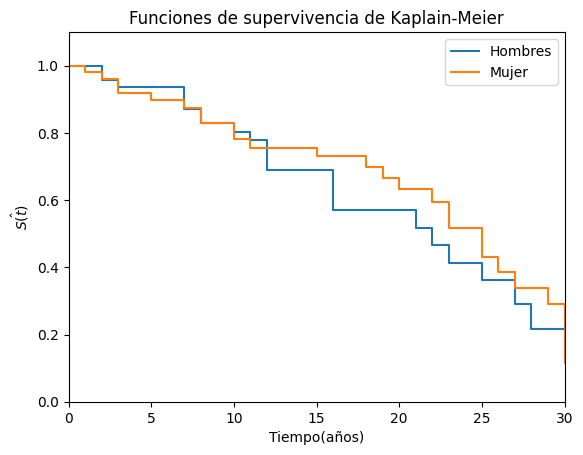

In [62]:
##graficar hombres y mujeres
km_h.plot_survival_function(ci_show=False, label = 'Hombres')
km_m.plot_survival_function(ci_show=False, label = 'Mujer')
plt.xlim(0,30)
plt.title('Funciones de supervivencia de Kaplain-Meier')
plt.xlabel('Tiempo(años)')
plt.ylim(0,1.1)
plt.ylabel('$\hat{S(t)}$');

Las empresas muestran un comportamiento parecido, se observa que las empresas administradas por hombres quiebran más rápido que las empresas adminstradas por las mujeres ya que en cierto punto empieza a decrecer.

c) El profesor cree que las empresas fundadas por hombres quiebran más 
rápido, refute o confirme con evidencia estadística tal afirmación 
(pruebas de hipótesis, graficas, tablas etc.)

Para verificar que las funciones sean diferentes se crea una prueba de hipotesis

Prueba de hipotesis se llama **Log-rank-test**

$Ho: S(1) = S(2)$ *(funciones de supervivencia iguales)*

$Ha: S(1) \neq S(2)$ *(funciones de supervivencia distintas)*

In [69]:
from lifelines.statistics import logrank_test

In [70]:
## Realizamos el Log-rank-test
# Estructura: longrank_test ( tiempog1, tiempog2, eventog1, eventog2)
LRT = logrank_test(mujeres['tiempo'], hombres['tiempo'], mujeres['quebrar'], hombres['quebrar'])

In [71]:
LRT.print_summary() #Tabla de salida de prueba de hipotesis

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [72]:
LRT.p_value.round(2)

0.59

Como p value>alfa

No rechazamos H0 con 95% de confianza. Las funciones de supervivencia son iguales

Las empresas administradas tanto por hombres como mujeres quiebran al mismo tiempo


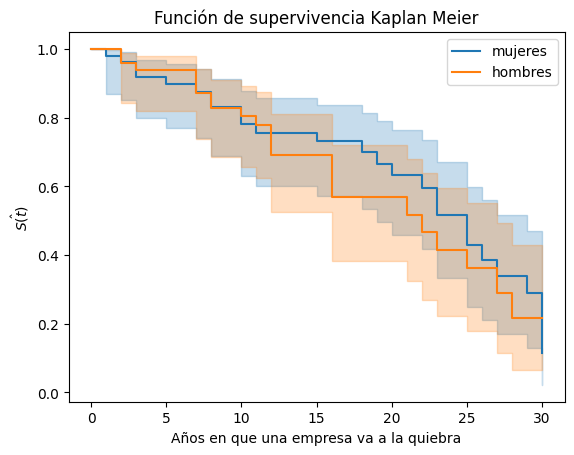

In [73]:
km_m.plot_survival_function(label = 'mujeres')
km_h.plot_survival_function(label = 'hombres');
#Poner las etiquetas
plt.title("Función de supervivencia Kaplan Meier")
plt.xlabel('Años en que una empresa va a la quiebra')
plt.ylabel('$\hat{S(t)}$')
plt.show();

En la gráfica los intervalos de confianza se interceptan, esto significa que puede ser iguales y se acepta con la evidencia estadística mostrada